<a href="https://colab.research.google.com/github/OnkarDharma/NLP_Viterbi_Universal_Dataset/blob/master/Onkar_Dharmadhikari_EVA_S1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt

# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

In [0]:
image = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")

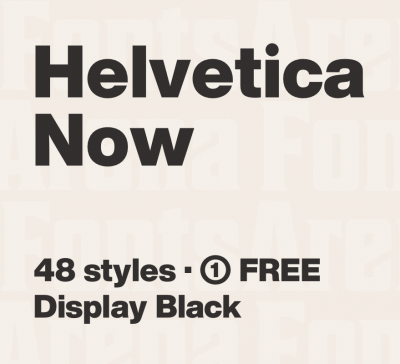

In [112]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [0]:
edges = cv2.Canny(image,100,200)

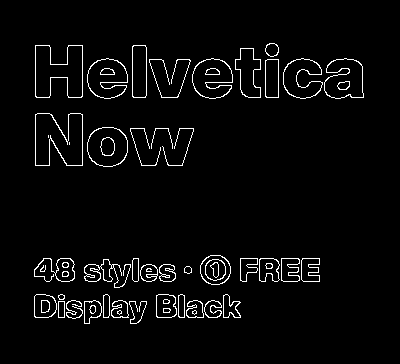

In [114]:
cv2_imshow(edges)

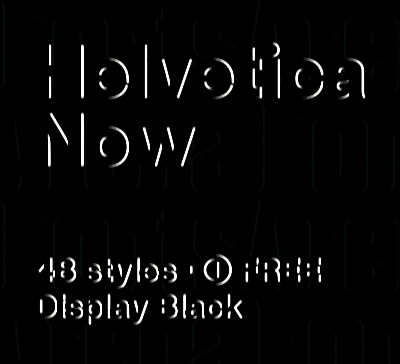

In [115]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-1,0,1],[-1,0,1],[-1,0,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

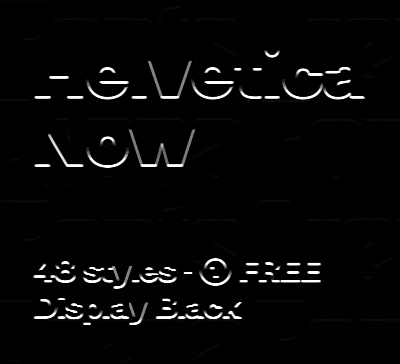

In [116]:
# Writing code for Horizontal edge detector
kernel = np.float32([[-1,-1,-1],[0,0,0],[1,1,1]])

dst = cv2.filter2D(image,cv2.CV_64F,kernel)
cv2_imshow(dst)

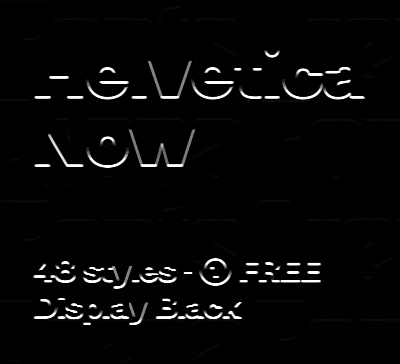

In [117]:
# Writing code for Horizontal edge detector changing the depth 
kernel = np.float32([[-1,-1,-1],[0,0,0],[1,1,1]])

dst = cv2.filter2D(image,cv2.CV_32F,kernel) # destination depth parameter has been changed
cv2_imshow(dst)

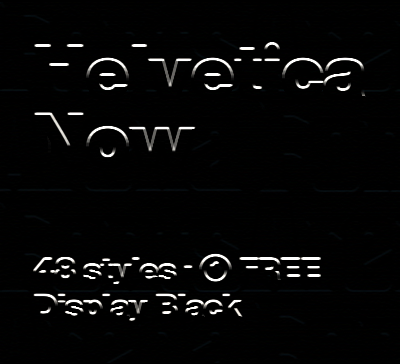

In [118]:
# Writing code for Horizontal edge detector changing the depth 
kernel = np.float32([[1,1,1],[0,0,0],[-1,-1,-1]]) # kernel has been changed

dst = cv2.filter2D(image,-1,kernel) # destination depth parameter has been changed
cv2_imshow(dst)

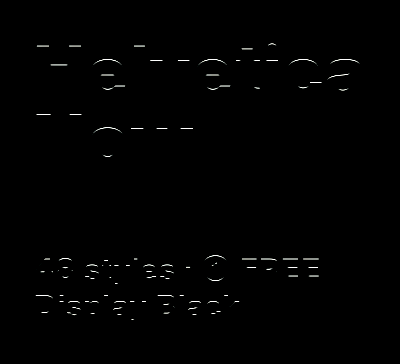

In [119]:
# Writing code for Horizontal edge detector changing kernel
kernel = np.float32([[1,1,1],[-1,-1,-1],[-1,-1,-1]]) # kernel has been changed

dst = cv2.filter2D(image,-1,kernel) 
cv2_imshow(dst)

Now I am getting two images. By applying one type of filter i am not getting all horizontal lines. So there is need to add two kernels. This leads me to find function from cv2 i.e. ***addWeighted***.


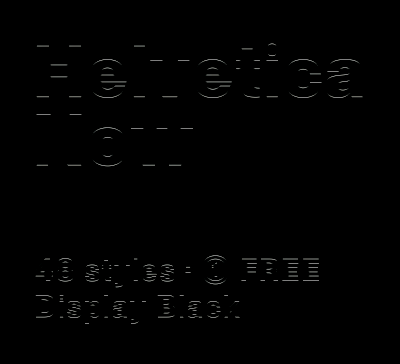

In [120]:
# This is the final Horizontal edge detector
# Writing code for Horizontal edge detector changing kernel
kernel = np.float32([[-1,-1,-1],[-1,-1,-1],[1,1,1]]) # kernel has been changed

dst1 = cv2.filter2D(image,-1,kernel) 

# Writing another code for Horizontal edge detector changing kernel
kernel_1 = np.float32([[1,1,1],[-1,-1,-1],[-1,-1,-1]]) # kernel has been changed

dst2 = cv2.filter2D(image,-1,kernel_1)

#doing summation of images
alpha = 0.5
beta = ( 1.0 - alpha );
cv2.addWeighted( dst1, alpha, dst2, beta, 0.0, dst);
cv2_imshow(dst)

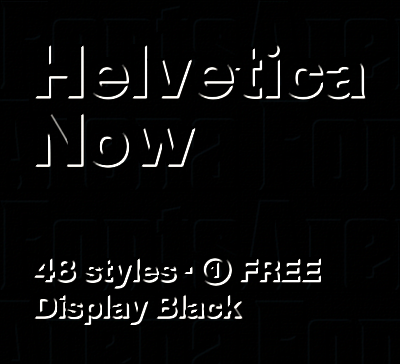

In [121]:
# Writing code for lines/edge 45 degree detector
kernel = np.float32([[-1,-1,0],[-1,0,1],[0,1,1]])
dst = cv2.filter2D(image,-1,kernel) 
cv2_imshow(dst)

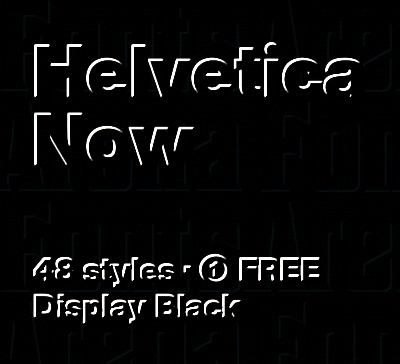

In [122]:
# Writing code for lines/edge 45 degree detector
kernel = np.float32([[2,1,0],[1,0,-1],[0,-1,-2]])
dst = cv2.filter2D(image,-1,kernel) 
cv2_imshow(dst)

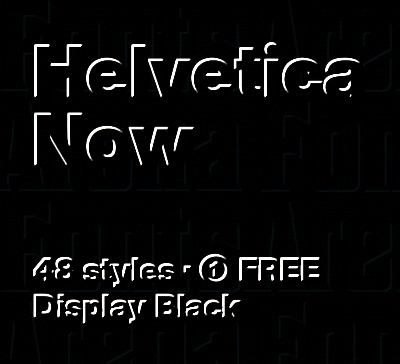

In [123]:
kernel_slant = cv2.HoughLines(edges,1,np.pi/4,200)
cv2_imshow(dst)

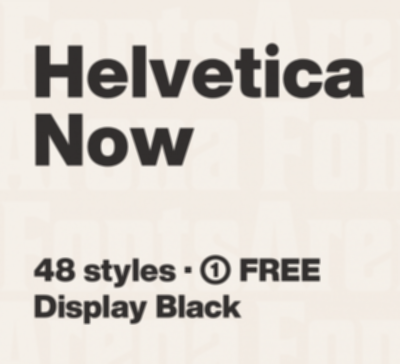

In [124]:
# Here adding the code for Blurring kernel
# construct average blurring kernels used to smooth an image
kernelBlur = np.ones((3, 3), dtype="float") * (1.0 / (3 * 3))
output_image = cv2.filter2D(image, -1, kernelBlur)
cv2_imshow(output_image)

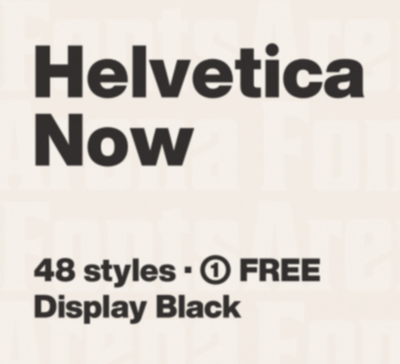

In [125]:
blur_kernel = np.float32([[1,2,1],[2,4,2],[1,2,1]])*(1/16)
output_image = cv2.filter2D(image, -1, blur_kernel)
cv2_imshow(output_image)

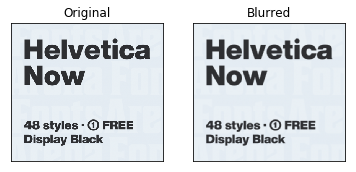

In [126]:
# Average Blurring
blur = cv2.blur(image,(3,3))
plt.subplot(121),plt.imshow(image),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

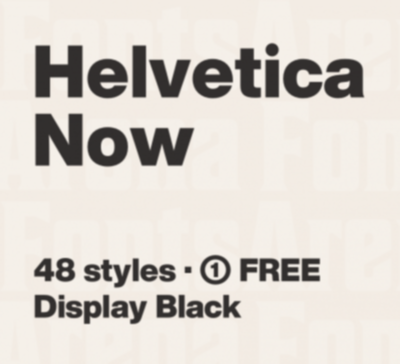

In [127]:
#Gaussian Blurring
blur = cv2.GaussianBlur(image,(3,3),0)
cv2_imshow(blur)

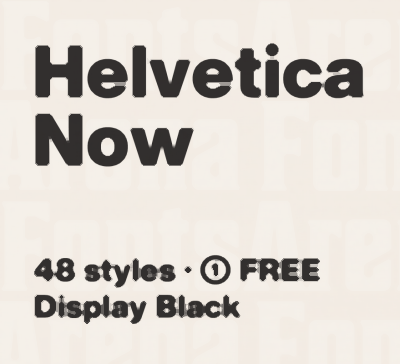

In [128]:
# Median Blur
median = cv2.medianBlur(image,5)
cv2_imshow(median)

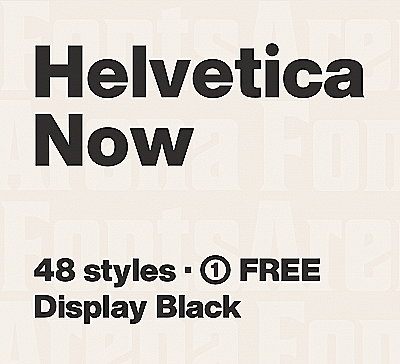

In [129]:
#Now we will look into Sharpen Kernel
# construct a sharpening filter
sharpen_kernel = np.array((
	[0, -1, 0],
	[-1, 5, -1],
	[0, -1, 0]), dtype="float")
output_image = cv2.filter2D(image, -1, sharpen_kernel)
cv2_imshow(output_image)

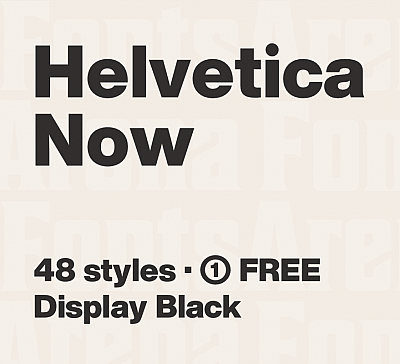

In [139]:
# Here i am trying to apply two 3*3 kernels for sharpening the image.
intense_kernel = np.array(([0,0,0],[0,2,0],[0,0,0]),dtype=float)
average_kernel = np.array(([1,1,1],[1,1,1],[1,1,1]),dtype=float)*(1.0/9.0)
sharpen_kernel = np.subtract(intense_kernel,average_kernel)
change_image = cv2.filter2D(image,-1,sharpen_kernel)
cv2_imshow(change_image)

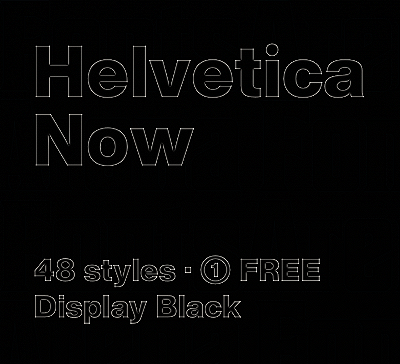

In [130]:
laplacian_kernel = cv2.Laplacian(image,cv2.CV_64F) # first parameter is image and second is depth
cv2_imshow(laplacian_kernel)

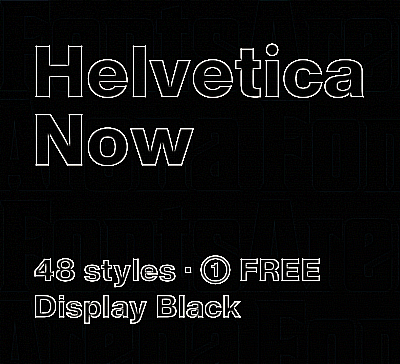

In [131]:
# first parameter is image and second is depth now adding another parameter as kernel size
laplacian_kernel = cv2.Laplacian(image,cv2.CV_64F,ksize=3)
cv2_imshow(laplacian_kernel)

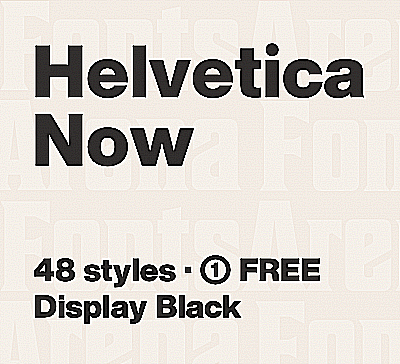

In [132]:
#defining sharpening kernel by own
sharpen_kernel = np.array(([-1,-1,-1],[-1,9,-1],[-1,-1,-1]),dtype="float")
output_image = cv2.filter2D(image, -1, sharpen_kernel)
cv2_imshow(output_image)

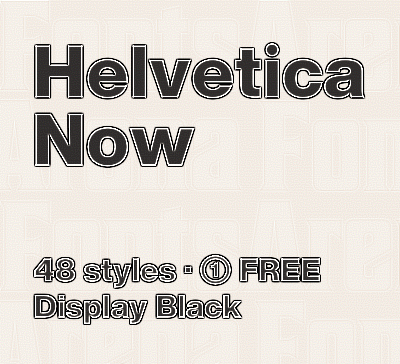

In [133]:
# trying to sharp the image more
sharpen_kernel = np.array(([1,1,1],[1,-7,1],[1,1,1]),dtype="float")
output_image = cv2.filter2D(image, -1, sharpen_kernel)
cv2_imshow(output_image)

Identity function filter Kernel
It is also called as no-convolution. This kernel won't change image i.e. image remain unchanged.

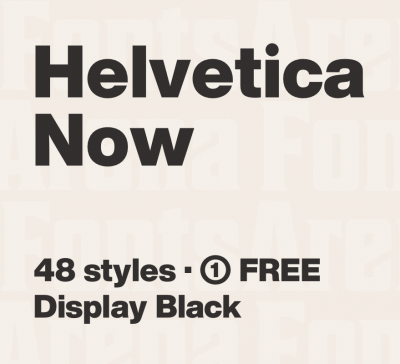

In [134]:
#Identity function or Identity matrix
kernel_identity = np.array(([0,0,0],[0,1,0],[0,0,0]),dtype="float")
dest_image = cv2.filter2D(image,-1,kernel_identity)
cv2_imshow(dest_image)